<a href="https://colab.research.google.com/github/abiraaaaaaf/Cattle-Detection/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cow detection (standing or sitting)

Fariba Lotfi.
Date: 26/10/2022

Cattle Dataset (Cattle images standing or sitting): 
* 245 training 
* 35 validation



**Main Problem:** Cow Detection (Standing or Sitting)

**YOLO vs. Faster RCNN**

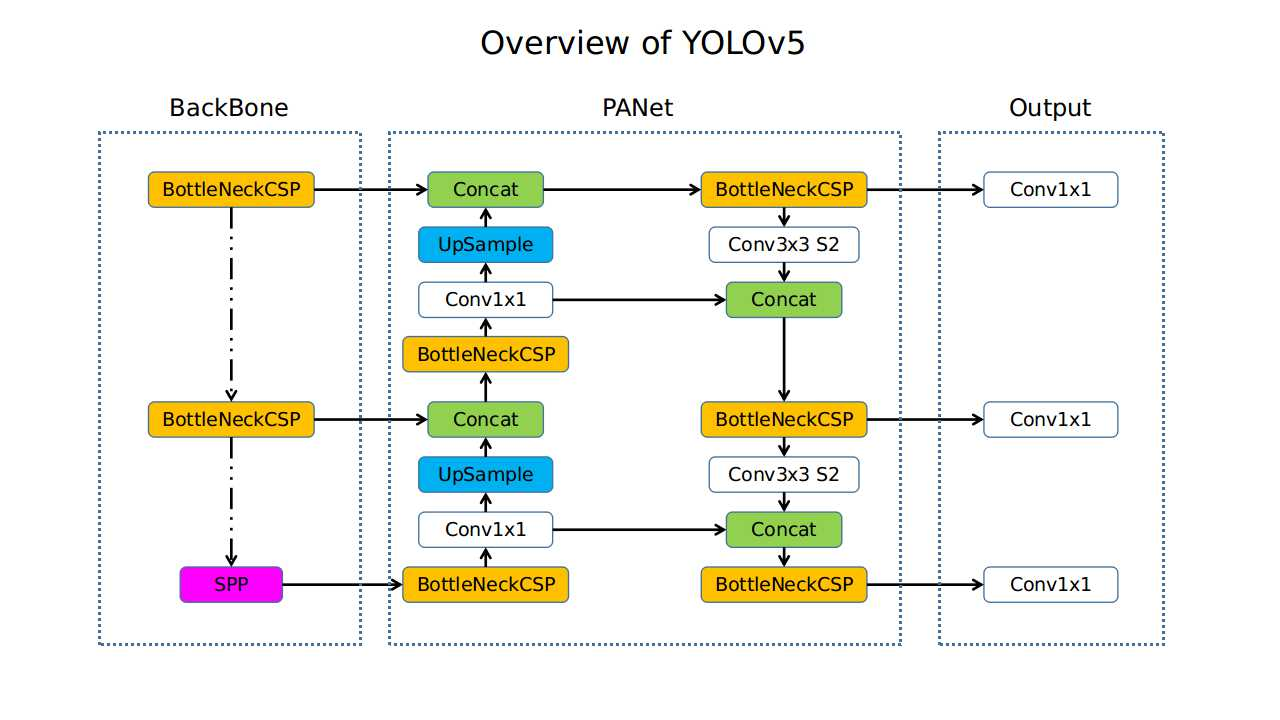

### Dataset Information

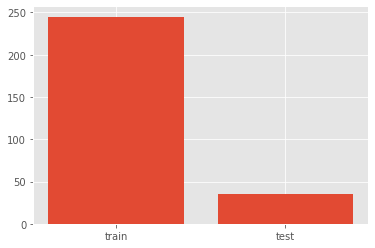

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.arange(2)
plt.bar(x, height=[245,35])
plt.xticks(x, ['train','test']);
plt.style.use('ggplot')
plt.show()

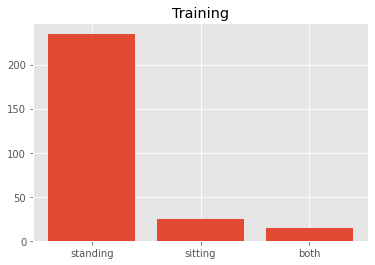

In [ ]:
import matplotlib.pyplot as plt
 
x = np.arange(3)
plt.bar(x, height=[235,25,15])
plt.xticks(x, ['standing','sitting','both']);
plt.style.use('ggplot')
plt.title('Training')
plt.show()

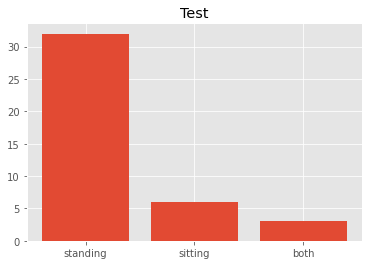

In [ ]:
import matplotlib.pyplot as plt
 
x = np.arange(3)
plt.bar(x, height=[32,6,3])
plt.xticks(x, ['standing','sitting','both']);
plt.style.use('ggplot')
plt.title('Test')
plt.show()

###Data Preparation


The data preparation phase has been done in my local computer!




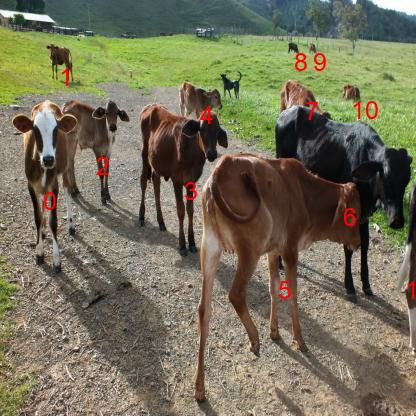



In [ ]:
# bounding_box_number.py file 

'''

For labeling, we number each cattle in the image at the center of each bounding box 
(bounding boxes overlap a lot and makes the task of labeling a little challenging)

'''

import cv2
import numpy as np
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

def load_images_from_folder(folder):
    images = []
    names = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            names.append(filename[:-4]+'.txt')
    return images, names

mode = 'train'
cwd = os.getcwd()
cwd = cwd.replace('\\','/')
font = ImageFont.truetype("arial.ttf", 25)

if mode == 'train': 
    images, names = load_images_from_folder(cwd + '/images1/')
    directory = cwd + "/train_labels/"
    bb_directory = cwd + "/images1_edited/"
else: 
    images, names = load_images_from_folder(cwd + '/images2/')
    directory = cwd + "/valid_labels/"
    bb_directory = cwd + "/images2_edited/"


print(len(images))

cnt = 0
for img in images:
    print('Sample ', cnt)
    result = img.copy()
    draw = ImageDraw.Draw(result)
    f = open(directory + names[cnt],'r')
    lines = f.readlines()
    index = 0
    for line in lines:
        l = line.split()
        x, y, w, h = float(l[1]), float(l[2]), float(l[3]), float(l[4]) 
        print("x, y, w, h: ", x, y, w, h)        
        draw.text((x*416, y*416), str(index),(255,0,0),font=font)
        print('Next Line')
        index += 1
    print('Save resulting image ', cnt) 
    result.save(bb_directory + names[cnt][:-4]+'.jpg')
    cnt += 1



There has been another file (User Interface) for labelling the images as standing or sitting which I changed my code for another project to label large amounts of cattle image data and I'm not allowed to share. Sorry for that :)





In [ ]:
# CattleLabeling.py file


'''

Labeling each cattle in the image as sitting or standing corresponding to 0 or 1

In the final dataset, we have labeled 245 samples as train data and 35 samples as test data

'''




In [ ]:
# move.py file

'''

Moving labeled images to another separate file :)

'''


import glob
import shutil
import os


dir1 = 'train_labels_/'
dir2 = 'valid_labels_/'

def load_names_from_folder(folder):
    names = []
    dir_list = os.listdir(folder)
    dir_list.sort()
    for filename in dir_list:
        names.append(filename)
    return names
    
names1 = load_names_from_folder(dir1)
names2 = load_names_from_folder(dir2)

src_dir1 = "images1"
dst_dir1 = "data/train/images"

for jpgfile in glob.iglob(os.path.join(src_dir1, "*.jpg")):
    for i in range(len(names1)):
        if names1[i][:-4] == jpgfile[8:-4]:
            shutil.copy(jpgfile, dst_dir1)

    
src_dir2 = "images2"
dst_dir2 = "data/valid/images"
for jpgfile in glob.iglob(os.path.join(src_dir2, "*.jpg")):
    for i in range(len(names2)):
        if names2[i][:-4] == jpgfile[8:-4]:
            shutil.copy(jpgfile, dst_dir2)
            

In [ ]:
# divideclasses.py file

'''

divide samples to two classes (standing and sitting)

'''


import shutil
import glob
import os

def get_filenames(folder):
    filenames = []    
    for path in glob.glob(os.path.join(folder, '*.jpg')):
        # Extract the filename
        filename = os.path.split(path)[-1]        
        filenames.append(filename)
    return filenames


# image filename sets
images_train = get_filenames('data/train/images')
images_valid = get_filenames('data/valid/images')

def return_classes(filenames, files_dir):

    class1names, class2names = [], []
    for file in filenames:
        with open(files_dir + file[:-4]+'.txt') as f:
            lines = f.readlines()
            for line in lines:
                if line[0] == '0' and file not in class2names:
                    class2names.append(file[:-4])
                elif line[0] == '1' and file not in class1names:
                    class1names.append(file[:-4])
                        
    return class1names, class2names

class_train_standing, class_train_sitting = return_classes(images_train, 'data/train/labels/')
class_valid_standing, class_valid_sitting = return_classes(images_valid, 'data/valid/labels/')

dir1, lbl1 = 'data/train/images/standing', 'data/train/labels/standing'
dir2, lbl2 = 'data/train/images/sitting', 'data/train/labels/sitting'
dir3, lbl3 = 'data/valid/images/standing', 'data/valid/labels/standing'
dir4, lbl4 = 'data/valid/images/sitting', 'data/valid/labels/sitting'

src1 = 'data/train/'
src2 = 'data/valid/'

if not os.path.exists(dir1):    os.makedirs(dir1)
if not os.path.exists(dir2):    os.makedirs(dir2)
if not os.path.exists(dir3):    os.makedirs(dir3)
if not os.path.exists(dir4):    os.makedirs(dir4)
if not os.path.exists(lbl1):    os.makedirs(lbl1)
if not os.path.exists(lbl2):    os.makedirs(lbl2)
if not os.path.exists(lbl3):    os.makedirs(lbl3)
if not os.path.exists(lbl4):    os.makedirs(lbl4)

def copyfiles(classnames, src, directory1, directory2):
    for name in classnames:
        shutil.copy(src + 'labels/' + name + '.txt', directory2)
        shutil.copy(src + 'images/' + name + '.jpg', directory1)
   
copyfiles(class_train_standing, src1, dir1, lbl1)      
copyfiles(class_train_sitting, src1, dir2, lbl2)      
copyfiles(class_valid_standing, src2, dir3, lbl3)      
copyfiles(class_valid_sitting, src2, dir4, lbl4)      
     

###YOLO

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

     |████████████████████████████████| 1.6 MB 4.0 MB/s 


Drawing a sample image from the dataset:

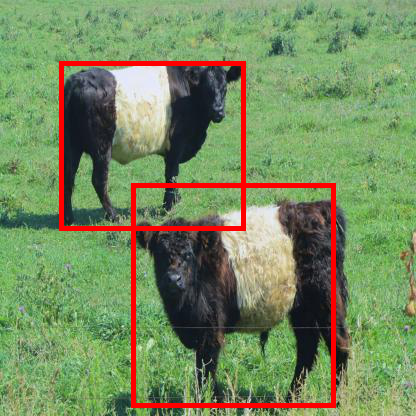

In [ ]:
from PIL import Image, ImageDraw
import IPython.display as display

def show_bbox(image_path):
    # convert image path to label path
    label_path = image_path.replace('/images/', '/darknet/')
    label_path = label_path.replace('.jpg', '.txt')

    # Open the image and create ImageDraw object for drawing
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Split the line into five values
            label, x, y, w, h = line.split(' ')

            # Convert string into float
            x = float(x)
            y = float(y)
            w = float(w)
            h = float(h)

            # Convert center position, width, height into
            # top-left and bottom-right coordinates
            W, H = image.size
            x1 = (x - w/2) * W
            y1 = (y - h/2) * H
            x2 = (x + w/2) * W
            y2 = (y + h/2) * H

            # Draw the bounding box with red lines
            draw.rectangle((x1, y1, x2, y2),
                           outline=(255, 0, 0), # Red in RGB
                           width=5)             # Line width
    
    image.save('result.jpg')
    display.display(image)

    image.show()
    
show_bbox('6bf668373f6c1d0a_jpg.rf.5ba8536683564aa448aa45a220ba35e5.jpg')

Cloning Yolov5:

In [ ]:
!git clone https://github.com/ultralytics/yolov5

!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14450, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 14450 (delta 7), reused 14 (delta 5), pack-reused 14430
Receiving objects: 100% (14450/14450), 13.38 MiB | 38.06 MiB/s, done.
Resolving deltas: 100% (9985/9985), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 26.8 MB/s 
     |████████████████████████████████| 3.1 MB 44.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |██████████████████████████████  | 834.1 MB 1.3 MB/s eta 0:00:45tcmalloc: large alloc 1147494400 bytes == 0x2818000 @  0x7fd6bc507615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x

The dataset has been uploaded on my Google Drive and I can send it to you or share the directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/cattle"

Mounted at /content/drive/
cattle	cattle.rar  data.rar


In [ ]:
!unrar x -r -o- "/content/drive/My Drive/cattle/data.rar" '/content/yolov5/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/cattle/data.rar

Extracting  /content/yolov5/data/data.yaml                                 0%  OK 
Creating    /content/yolov5/data/train                                OK
Creating    /content/yolov5/data/train/images                         OK
Creating    /content/yolov5/data/train/images/sitting                 OK
Extracting  /content/yolov5/data/train/images/sitting/00126a640cabc9c1_jpg.rf.36c8072847cbffe43d7c838e147ac8ba.jpg       0%  OK 
Extracting  /content/yolov5/data/train/images/sitting/00eea1bf8574f93d_jpg.rf.0d2be4d7eae129655bc76d9e3d5c0f57.jpg       0%  OK 
Extracting  /content/yolov5/data/train/images/sitting/00f14e10ea680e59_jpg.rf.25fe56dea8f6e015e1bb998c65faf6d6.jpg       0%  OK 
Extracting  /content/yolov5/data/train/images/sitting/0125d9e468447468_jpg.rf.f21ef5a5dfc41c79aec30783362b9bfe.jpg       1%  OK 
Extracting 

In [ ]:
import glob
import os

def get_filenames(folder):
    filenames = set()
    
    for path in glob.glob(os.path.join(folder, '*.jpg')):
        # Extract the filename
        filename = os.path.split(path)[-1]        
        filenames.add(filename)

    return filenames


# sitting or standing image filename sets - train
images_standing_train = get_filenames('yolov5/data/train/images/standing')
images_sitting_train = get_filenames('yolov5/data/train/images/sitting')

# sitting or standing image filename sets - test
images_standing_test = get_filenames('yolov5/data/valid/images/standing')
images_sitting_test = get_filenames('yolov5/data/valid/images/sitting')

In [ ]:
# Check for duplicates train
duplicates_train = images_standing_train & images_sitting_train

print(len(duplicates_train))

15


In [ ]:
# Check for duplicates test
duplicates_test = images_standing_test & images_sitting_test

print(len(duplicates_test))

3


In [ ]:
!pip install --upgrade pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

images_standing_train = np.array(list(images_standing_train))
images_sitting_train = np.array(list(images_sitting_train))

images_standing_test = np.array(list(images_standing_test))
images_sitting_test = np.array(list(images_sitting_test))


# Use the same random seed for reproducability
np.random.seed(42)
np.random.shuffle(images_standing_train)
np.random.shuffle(images_sitting_train)

In [ ]:
import shutil

def split_dataset(animal, image_names_train, image_names_test):
  for i, image_name in enumerate(image_names_train):
    # Label filename
    label_name = image_name.replace('.jpg', '.txt')
    
    # Source paths
    source_image_path_train = f'yolov5/data/train/images/{animal}/{image_name}'
    source_label_path_train = f'yolov5/data/train/labels/{animal}/{label_name}'

    # Destination paths
    target_image_folder_train = f'yolov5/data/train/images/train'
    target_label_folder_train = f'yolov5/data/train/labels/train'

    # Copy files
    shutil.copy(source_image_path_train, target_image_folder_train)
    shutil.copy(source_label_path_train, target_label_folder_train)
    
  for i, image_name in enumerate(image_names_test):
    # Label filename
    label_name = image_name.replace('.jpg', '.txt')
    
    # Source paths
    source_image_path_test = f'yolov5/data/valid/images/{animal}/{image_name}'
    source_label_path_test = f'yolov5/data/valid/labels/{animal}/{label_name}'

    # Destination paths
    target_image_folder_test = f'yolov5/data/valid/images/test'
    target_label_folder_test = f'yolov5/data/valid/labels/test'

  # Copy files
  shutil.copy(source_image_path_train, target_image_folder_train)
  shutil.copy(source_label_path_train, target_label_folder_train)
  shutil.copy(source_image_path_test, target_image_folder_test)
  shutil.copy(source_label_path_test, target_label_folder_test)

# sitting data
split_dataset('sitting', images_sitting_train, images_sitting_test)

# standing data 
split_dataset('standing', images_standing_train, images_standing_test) 

In [ ]:
!pip install torch==1.10.1 torchvision==0.11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x3a3e0000 @  0x7f723d521615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 881.9 MB 15 kB/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0
    Uninstalling torchvision-0.14.0:
      Successfully uninstalled torchvision-0.14.0
ERROR: pip's dependency resolver does not current

In [ ]:
!python yolov5/train.py --data yolov5/data/data.yaml --weights yolov5s.pt --epochs 10 --batch 4 --freeze 20

train: weights=yolov5s.pt, cfg=, data=yolov5/data/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[20], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.15 torch-1.10.1+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [ ]:
!python yolov5/val.py --data yolov5/data/data.yaml --weights yolov5/runs/train/exp2\/weights/best.pt

val: data=yolov5/data/data.yaml, weights=['yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.15 torch-1.10.1+cu102 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/yolov5/data/valid/labels/sitting.cache' images and labels... 38 found, 0 missing, 0 empty, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:14<00:00,  7.22s/it]
                   all         38        144      0.796      0.295      0.425      0.213
              standing         38         34          1          0      0.292      0.115
            

References:


*   https://kikaben.com/yolov5-transfer-learning-dogs-cats/
